In [1]:
# Here, I import important libraries for sales prediction 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Here, dataset is loding
data = pd.read_csv('Advertising Budget and Sales.csv')
print(data.head(10))


   SL.No  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0      1             230.1                 37.8                     69.2   
1      2              44.5                 39.3                     45.1   
2      3              17.2                 45.9                     69.3   
3      4             151.5                 41.3                     58.5   
4      5             180.8                 10.8                     58.4   
5      6               8.7                 48.9                     75.0   
6      7              57.5                 32.8                     23.5   
7      8             120.2                 19.6                     11.6   
8      9               8.6                  2.1                      1.0   
9     10             199.8                  2.6                     21.2   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  
5        7.2  
6       11.8  
7       13.2  
8        4.8  
9       10.6 

In [3]:
# Here, checking the total number of rows in dataset
print(data.index)

RangeIndex(start=0, stop=200, step=1)


In [4]:
# Here, Describing the given dataset
print(data.describe)

<bound method NDFrame.describe of      SL.No  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0        1             230.1                 37.8                     69.2   
1        2              44.5                 39.3                     45.1   
2        3              17.2                 45.9                     69.3   
3        4             151.5                 41.3                     58.5   
4        5             180.8                 10.8                     58.4   
..     ...               ...                  ...                      ...   
195    196              38.2                  3.7                     13.8   
196    197              94.2                  4.9                      8.1   
197    198             177.0                  9.3                      6.4   
198    199             283.6                 42.0                     66.2   
199    200             232.1                  8.6                      8.7   

     Sales ($)  
0         22

In [5]:
# Here, Checking the columns items in given dataset
print(data.columns)

Index(['SL.No', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')


In [6]:
# Here, Checking for missing values
print(data.isnull().sum())

SL.No                      0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64


C:\Users\Rajdeep suman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


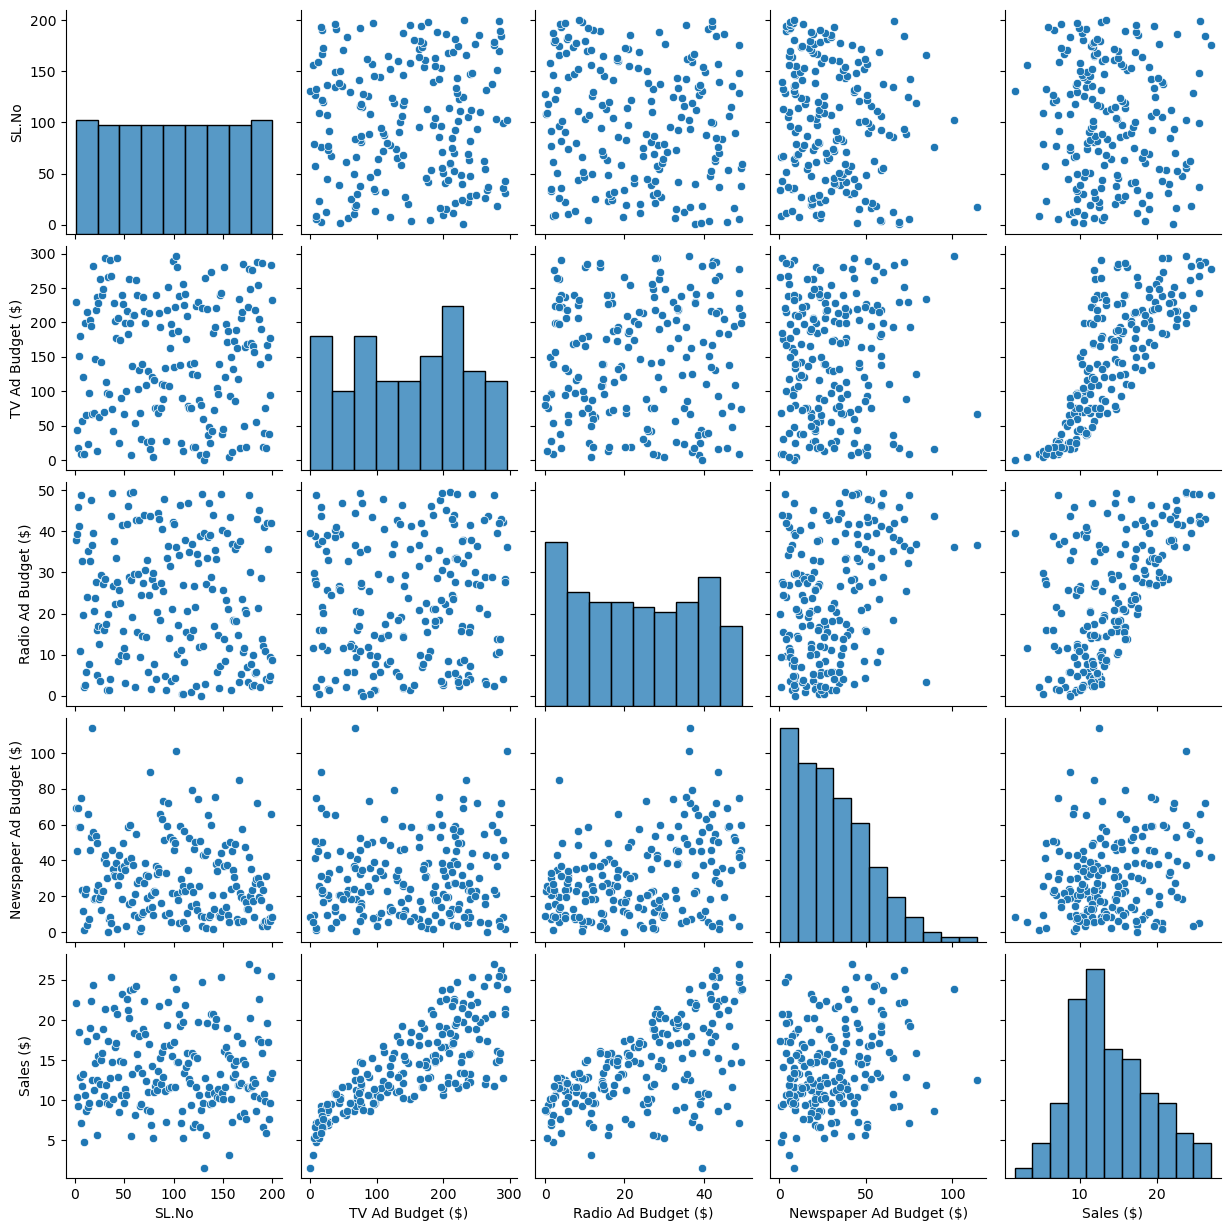

In [11]:
# Here, Analyze the given dataset though graphical reprerepresentation 
sns.pairplot(data)
plt.show()


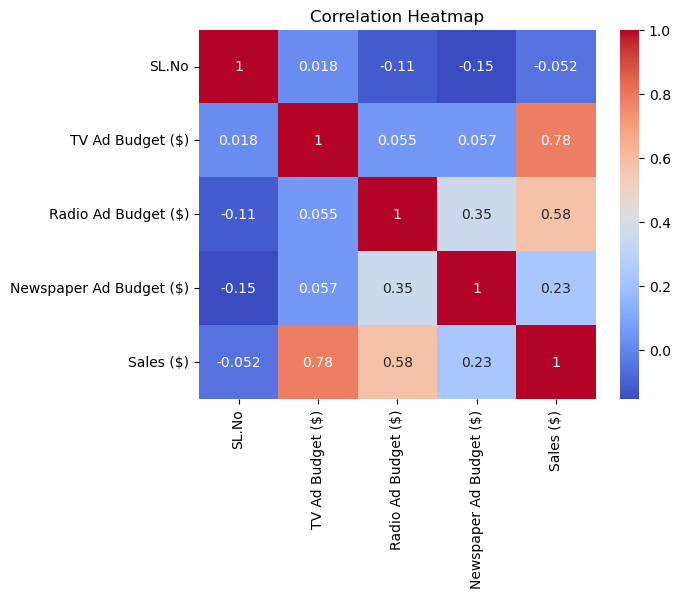

In [12]:
# Here, Heatmap for given Dataset
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [13]:
# Here, Adding interaction terms 
data['TV_Radio_Interaction'] = data['TV Ad Budget ($)'] * data['Radio Ad Budget ($)']
data['TV_Newspaper_Interaction'] = data['TV Ad Budget ($)'] * data['Newspaper Ad Budget ($)']

# Here, Defining features (X) and target (y)
X = data[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
          'TV_Radio_Interaction', 'TV_Newspaper_Interaction']]
y = data['Sales ($)']

# Here, Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Here, Split dataset for traning and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Here, Train multiple modles
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}

# Here, Evaluate the model by Cross validation 
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} - Mean R² Score: {scores.mean():.4f}")

# Here, Hyperparameter tuning for the best model (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)

# Here,Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Here, Predictions on testing dataset
y_pred = best_model.predict(X_test)

# Here, Evaluation of model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Here,Save the model
joblib.dump(best_model, 'best_sales_model.pkl')
print("Model saved as 'best_sales_model.pkl'")



Linear Regression - Mean R² Score: 0.9489
Decision Tree - Mean R² Score: 0.9737
Random Forest - Mean R² Score: 0.9844
Support Vector Regressor - Mean R² Score: 0.8474
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.3279886870035992
R-squared Score: 0.9896086393203055
Model saved as 'best_sales_model.pkl'


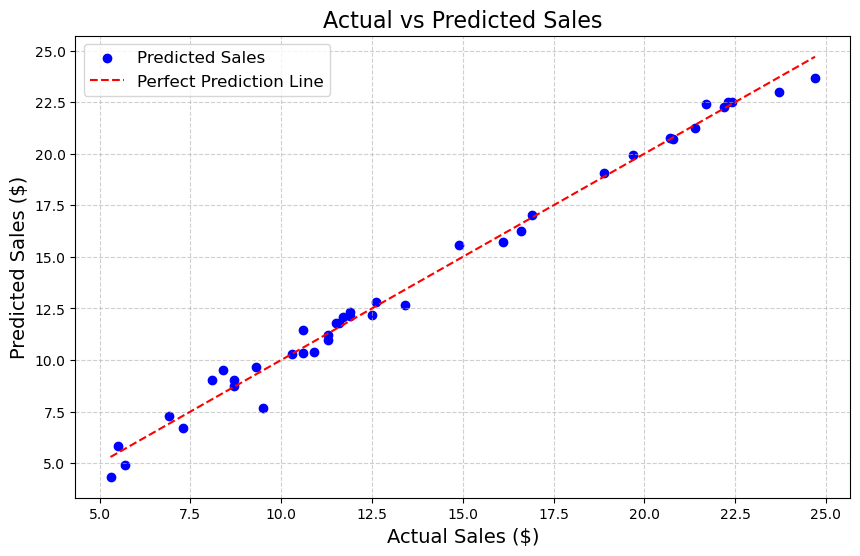

In [14]:
# Here, Visualization of Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction Line')
plt.xlabel("Actual Sales ($)", fontsize=14)
plt.ylabel("Predicted Sales ($)", fontsize=14)
plt.title("Actual vs Predicted Sales", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=12)
plt.show()



In [15]:
# Here, Prediction of sales based on User input
def predict_sales():
    try:
        tv_budget = float(input("Enter TV Ad Budget ($): "))
        radio_budget = float(input("Enter Radio Ad Budget ($): "))
        newspaper_budget = float(input("Enter Newspaper Ad Budget ($): "))

        # Here, Calculate interaction terms
        tv_radio_interaction = tv_budget * radio_budget
        tv_newspaper_interaction = tv_budget * newspaper_budget

        # Here, Create a DataFrame for the user input
        user_data = pd.DataFrame({
            'TV Ad Budget ($)': [tv_budget],
            'Radio Ad Budget ($)': [radio_budget],
            'Newspaper Ad Budget ($)': [newspaper_budget],
            'TV_Radio_Interaction': [tv_radio_interaction],
            'TV_Newspaper_Interaction': [tv_newspaper_interaction]
        })
        user_data_scaled = scaler.transform(user_data)
        predicted_sales = best_model.predict(user_data_scaled)
        print(f"Predicted Sales: ${predicted_sales[0]:.2f}")

    except ValueError:
        print("Invalid input. Please enter numerical values.")

# Here, Calling the function to predict the salesman
predict_sales()


Enter TV Ad Budget ($): 23
Enter Radio Ad Budget ($): 36
Enter Newspaper Ad Budget ($): 56
Predicted Sales: $9.00
